<a href="https://colab.research.google.com/github/quimHM/QHM_TFG_repository/blob/main/HMDA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fitter


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from fitter import Fitter
#unpickled_df = pd.read_pickle("/content/drive/MyDrive/s170BLfdSYPp") #https://liveproject.manning.com/module/405_2_1/measuring-bias-in-a-dataset/1--load-the-hmda-dataset-into-a-pandas-dataframe/1-1-workflow%3a-load-the-hmda-dataset-into-a-pandas-dataframe?
unpickled_df = pd.read_csv("/content/drive/MyDrive/TFG/state_AL-GA_actions_taken_1-3.csv")
print("samples:",len(unpickled_df))
print("features:",len(unpickled_df.columns))
for c in unpickled_df.columns: 
  print(c+": ",unpickled_df.iloc[0][c])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


samples: 788548
features: 99
activity_year:  2020
lei:  7H6GLXDRUGQFU57RNE97
derived_msa-md:  12060
state_code:  GA
county_code:  13135.0
census_tract:  13135050607.0
conforming_loan_limit:  C
derived_loan_product_type:  Conventional:First Lien
derived_dwelling_category:  Single Family (1-4 Units):Site-Built
derived_ethnicity:  Not Hispanic or Latino
derived_race:  Asian
derived_sex:  Male
action_taken:  1
purchaser_type:  3
preapproval:  2
loan_type:  1
loan_purpose:  31
lien_status:  1
reverse_mortgage:  2
open-end_line_of_credit:  2
business_or_commercial_purpose:  2
loan_amount:  205000.0
loan_to_value_ratio:  68.0
interest_rate:  2.75
rate_spread:  -0.56256
hoepa_status:  2
total_loan_costs:  3003.52
total_points_and_fees:  nan
origination_charges:  1960.58
discount_points:  765.58
lender_credits:  nan
loan_term:  120
prepayment_penalty_term:  nan
intro_rate_period:  nan
negative_amortization:  2
interest_only_payment:  2
balloon_payment:  2
other_nonamortizing_features:  2
proper

(array([ 2896.,  7374., 12049., 11825., 11802., 18353., 14796., 16657.,
        17444., 17226., 26873., 21397., 26133., 25845., 26927., 31490.,
        29074., 28415., 28450., 25994., 28601., 24987., 25190., 22950.,
        22502., 22286., 19195., 17793., 16639., 14356., 15104., 12232.,
        11890., 10857.,  9816.,  9906.,  8783.,  7645.,  7630.,  6449.,
         7326.,  4905.,  4691.,  3952.,  4144.,  4053.,  3283.,  3239.,
         3418.,  2648.,  3805.,  9008.,   513.,   490.,   636.,   594.,
          552.,   518.,   511.,   412.,   587.,   430.,   435.,   433.,
          393.,   497.,   394.,   344.,   380.,   298.,   419.,   331.,
          307.,   241.,   262.,   463.,   258.,   178.,   233.,   170.,
          284.,   146.,   172.,   151.,   163.,   202.,   124.,   145.,
          154.,   100.,   191.,   106.,   127.,   105.,   124.,   110.,
          126.,    87.,   107.,   144.]),
 array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.

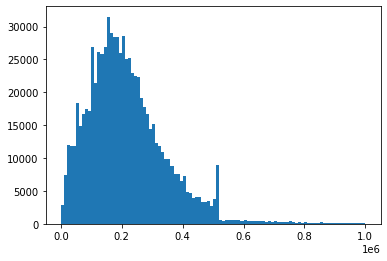

In [ ]:
#print(unpickled_df.loan_amount_000s)
#plt.hist(unpickled_df.loan_amount_000s, bins=100, range=[0, 1250])
plt.hist(unpickled_df.loan_amount, bins=100, range=[0, 1000000])

In [ ]:
#f = Fitter(X_test["loan_amount"], xmax=1000000,
#           distributions=['gamma', "beta", "norm"])
#f.fit()
#f.summary()

In [ ]:
#b = f.get_best()
#print(b)
#r = (np.random.beta(b["beta"]["a"],b["beta"]["b"])-b["beta"]["loc"])/b["beta"]["scale"]*1000
#print(r)

In [ ]:
from scipy.stats import beta
#r = beta.rvs(b["beta"]["a"],b["beta"]["b"],b["beta"]["loc"],b["beta"]["scale"],size=100000)
#plt.hist(r, bins=100)

In [ ]:
subsample = unpickled_df                    

print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==3]))
subsample = subsample.loc[subsample["action_taken"].isin([1,3])]
subsample["action_taken"] = subsample["action_taken"].replace([3],[0])    
print("action:",subsample["action_taken"].unique())
print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))

print("race pre:",subsample["applicant_race-1"].unique())
subsample = subsample.loc[subsample["applicant_race-1"].isin([3,5])]
subsample["applicant_race-1"] = subsample["applicant_race-1"].replace([5,3],[0,1])
print("race:",subsample["applicant_race-1"].unique())

print("ethnicity pre:",subsample["applicant_ethnicity-1"].unique())
subsample = subsample.loc[subsample["applicant_ethnicity-1"].isin([1,2])]
subsample["applicant_ethnicity-1"] = subsample["applicant_ethnicity-1"].replace([2,1],[0,1])
print("ethnicity:",subsample["applicant_ethnicity-1"].unique())

print("sex pre",subsample["applicant_sex"].unique())
subsample = subsample.loc[subsample["applicant_sex"].isin([1,2])]
subsample["applicant_sex"] = subsample["applicant_sex"].replace([1,2],[0,1])
print("sex:",subsample["applicant_sex"].unique())


print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))

print(len(subsample))
#subsample = subsample[["loan_type", "property_type", "loan_purpose", "loan_amount_000s",
#                            "action_taken","applicant_ethnicity","applicant_race_1","applicant_sex",
#                           "applicant_income_000s"]]

637571 150977
action: [1 0]
637571 150977
race pre: [22.  5.  3.  6. 25. 21.  1.  2. 23. 27. 26. 24. 44.  7.  4. nan 42. 43.
 41.]
race: [0. 1.]
ethnicity pre: [ 2.  1. 14. 12. 11.  3. 13.  4. nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


ethnicity: [0. 1.]
sex pre [2 1 3 6 4]
sex: [1 0]
485315 109127
594442


In [ ]:
#subsample = unpickled_df[["loan_type", "property_value", "loan_purpose", "loan_amount",
#                            "action_taken","applicant_ethnicity-1","applicant_race-1","applicant_sex",
#                           "income",'occupancy_type']]
#subsample = unpickled_df[["loan_type", "property_type", "loan_purpose", "loan_amount_000s",
#                            "action_taken","action_taken_name","applicant_ethnicity","applicant_ethnicity_name","applicant_race_1","applicant_race_name_1","applicant_sex","applicant_sex_name",
#                           "applicant_income_000s",'owner_occupancy']]

#PAPER A https://www.mdpi.com/2504-4990/4/1/11
#DATA DE https://ffiec.cfpb.gov/data-browser/data/2019?category=counties&items=01001&actions_taken=1,3
#CAL TRIAR LES FEATURES? SOBRETOT, PILLAR LES derived_ethnicity, derived_race etc (https://ffiec.cfpb.gov/documentation/2018/data-browser-filters/)

"""
subsample = unpickled_df                           
subsample["action_taken"] = subsample["action_taken"].replace([3],[0])
print(subsample["action_taken_name"].unique())
print(subsample["action_taken"].unique())
print(len(subsample["action_taken"]==1),len(subsample["action_taken"]==0))

subsample = subsample.loc[((subsample["applicant_race_1"]==3) | (subsample["applicant_race_1"]==5))]
print(subsample["applicant_race_name_1"].unique())
subsample["applicant_race_1"] = subsample["applicant_race_1"].replace([5,3],[1,2])
print(subsample["applicant_race_1"].unique())

print(subsample["applicant_ethnicity_name"].unique())
subsample["applicant_ethnicity"] = subsample["applicant_ethnicity"].replace([2,1],[1,2])
print(subsample["applicant_ethnicity"].unique())

print(subsample["applicant_sex_name"].unique())
print(subsample["applicant_sex"].unique())
"""

#subsample = subsample[["loan_type", "property_type", "loan_purpose", "loan_amount_000s",
#                            "action_taken","applicant_ethnicity","applicant_race_1","applicant_sex",
#                           "applicant_income_000s"]]

'\nsubsample = unpickled_df                           \nsubsample["action_taken"] = subsample["action_taken"].replace([3],[0])\nprint(subsample["action_taken_name"].unique())\nprint(subsample["action_taken"].unique())\nprint(len(subsample["action_taken"]==1),len(subsample["action_taken"]==0))\n\nsubsample = subsample.loc[((subsample["applicant_race_1"]==3) | (subsample["applicant_race_1"]==5))]\nprint(subsample["applicant_race_name_1"].unique())\nsubsample["applicant_race_1"] = subsample["applicant_race_1"].replace([5,3],[1,2])\nprint(subsample["applicant_race_1"].unique())\n\nprint(subsample["applicant_ethnicity_name"].unique())\nsubsample["applicant_ethnicity"] = subsample["applicant_ethnicity"].replace([2,1],[1,2])\nprint(subsample["applicant_ethnicity"].unique())\n\nprint(subsample["applicant_sex_name"].unique())\nprint(subsample["applicant_sex"].unique())\n'

In [ ]:
print(len(subsample.loc[((subsample["action_taken"]==1))]),len(subsample.loc[((subsample["action_taken"]==0))]))

485315 109127


In [ ]:
def create_df(x,xcol,y,ycol):
  auxnparray = x.copy()
  newdf = pd.DataFrame(auxnparray, columns = xcol)
  newdf[ycol] = y.tolist()
  return newdf

In [ ]:
from matplotlib import pyplot as plt
def show_subgroups(df,bool_app_dec,bool_percent):
  subgroups = []
  subgroups_names = []
  R = ["W","B"]
  E = ["NH","H"]
  S = ["M","F"]
  for option in [0,1]:
    for option2 in [0,1]:
      for option3 in [0,1]:
          subgroups.append(df.loc[((df["applicant_race-1"]==option) & (df["applicant_ethnicity-1"]==option2) & (df["applicant_sex"]==option3))])
          subgroups_names.append(R[option-1]+"_"+E[option2-1]+"_"+S[option3-1])
  subgroups_app = []
  subgroups_dec = []
  percent = []
  for s in subgroups:
    #print(s["action_taken"])
    subgroups_app.append(len(s[s["action_taken"]==1]))
    subgroups_dec.append(len(s[s["action_taken"]==0]))
    if(len(s)!=0):
      percent.append(round(100*len(s[s["action_taken"]==1])/len(s),2))
    else:
      percent.append(0)
    #print(percent[-1],"%")

  fig = plt.figure()
  if(bool_app_dec):
    ax = fig.add_axes([0,0,1,1])
    ax.bar(subgroups_names,subgroups_app, color='r')
    ax.bar(subgroups_names,subgroups_dec, bottom=subgroups_app, color='b')
    ax.legend(labels=['Accepted', 'Denied'])
  if(bool_percent):
    ax2 = fig.add_axes([1,0,1,1])
    ax2.bar(subgroups_names,percent)
    ax2.legend(labels=['Approval rate'])
  if(bool_app_dec or bool_percent):
    plt.show()
  return (subgroups,subgroups_names,subgroups_app,subgroups_dec,percent)

85.59 %
82.53 %
83.38 %
80.42 %
72.14 %
69.51 %
76.55 %
71.14 %


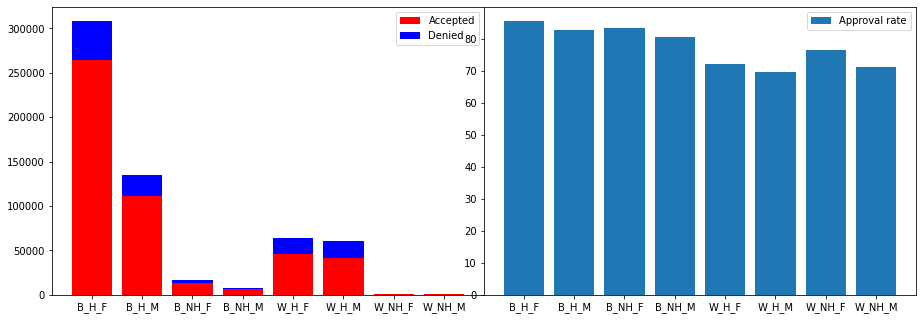

In [ ]:
subgroups = show_subgroups(subsample,True,True)

contribution to total approvals: [0.544, 0.23, 0.028, 0.013, 0.096, 0.086, 0.002, 0.001]
contribution to total amount   : [0.519, 0.228, 0.027, 0.013, 0.108, 0.101, 0.002, 0.002]


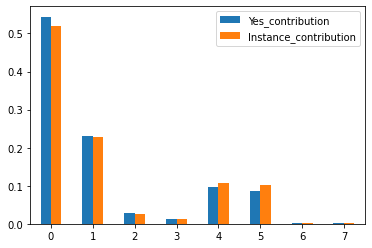

In [ ]:
#print([round(subgroups[2][s] / len(subgroups[0][s]),3) for s in range(len(subgroups[0]))]) #print(subgroups[4]) #the same
yes_contribution = [round(s / sum(subgroups[2]),3) for s in subgroups[2]]
instance_contribution = [round(len(s) / len(subsample),3) for s in subgroups[0]]
print("contribution to total approvals:",yes_contribution)
print("contribution to total amount   :",instance_contribution)
plot_contribution = pd.DataFrame({'Yes_contribution': yes_contribution,
                   'Instance_contribution': instance_contribution}, index=range(len(subgroups[0])))
ax = plot_contribution.plot.bar(rot=0)

In [ ]:
"""
subgroups = []
subgroups_names = []
R = ["W","B"]
E = ["NH","H"]
S = ["M","F"]
for option in [0,1]:
  for option2 in [0,1]:
    for option3 in [0,1]:
        subgroups.append(subsample.loc[((subsample["applicant_race-1"]==option) & (subsample["applicant_ethnicity-1"]==option2) & (subsample["applicant_sex"]==option3))])
        subgroups_names.append(R[option-1]+"_"+E[option2-1]+"_"+S[option3-1])
len(subgroups)
"""

In [ ]:
"""
subgroups_app = []
subgroups_dec = []
percent = []
for s in subgroups:
  subgroups_app.append(len(s[s["action_taken"]==1]))
  subgroups_dec.append(len(s[s["action_taken"]==0]))
  percent.append(round(100*len(s[s["action_taken"]==1])/len(s),2))
  print(len(s[s["action_taken"]==1]),len(s[s["action_taken"]==0]),round(100*len(s[s["action_taken"]==1])/len(s),2),"%")


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(subgroups_names,subgroups_app, color='r')
ax.bar(subgroups_names,subgroups_dec, bottom=subgroups_app, color='b')
ax.legend(labels=['Accepted', 'Denied'])
plt.show()
"""

In [ ]:
"""
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(65, 90)
ax.bar(subgroups_names,percent)
ax.legend(labels=['Approval rate'])
plt.show()
"""

In [ ]:
"""
for i in range(simulatedpeopleN):
  properties_i = {"ID":i,"Happiness":0,"Money":random.randint(0,1000),"NeedofMoney":random.randint(1,1000)}
  properties_i['Happiness'] = 100 * properties_i['Money'] / properties_i['NeedofMoney']
  dicPeople[i] = properties_i
print([item["Happiness"] for item in dicPeople.values() if item["Happiness"]>50])
"""
import math

#functions: 1-have/need, 2-need/70K limit, 3-suma de individus happy, dues persones 25% happy sumades son el mateix que una 50%?
def dimReturns(had,need): #https://stackoverflow.com/questions/2813621/how-do-you-create-a-formula-that-has-diminishing-returns
  #x = had/need
  #return 1 / (1 + math.exp(-x))
  #return (had*had) / (had*need) + 0
  #print(had,need)
  x = had/max(had,need) #SUPER REVISABLE TOT (aixo es per evitar divisio per 0 i/o overflow)
  return 100*(1/(1+100000**-(x-0.5)))

class Person():
  def __init__(self,i,p):
        self.id = i
        self.balance = 0 #could be a different initial b for each
        self.petition = p
        #self.need = n
        self.happiness = 0.0
        self.status = -1
  def updateH(self):
    self.happiness = dimReturns(self.balance,self.petition)
    return self.happiness

In [ ]:
print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))
print(len(subsample),len(subsample.columns),subsample.isnull().values.sum())

#thr=0.25
#for col in subsample.columns:
#  if (subsample[col].isnull().sum()>thr*len(subsample)):
    #subsample.drop(columns=[col])
#    print(col)

#subsample = subsample.dropna(axis=1,thresh=thr*len(subsample))
#subsample = subsample.dropna(axis=0)

# Iterate over each column of cc_apps
for col in subsample.columns:
    # Check if the column is of object type
    if subsample[col].dtypes == 'object':
        # Impute with the most frequent value
        subsample = subsample.fillna(subsample[col].value_counts().index[0])


print(len(subsample.loc[subsample["action_taken"]==1]),len(subsample.loc[subsample["action_taken"]==0]))

# Count the number of NaNs in the dataset and print the counts to verify
print(len(subsample),len(subsample.columns),subsample.isnull().values.sum())


In [ ]:
subsample["action_taken"].unique()

In [ ]:
# Import LabelEncoder
#from sklearn.preprocessing import OrdinalEncoder

#oe = OrdinalEncoder() 

#for col in subsample.columns:
#    if subsample[col].dtype=='object':
#        subsample[col] = oe.fit_transform(subsample[[col]])

In [ ]:
cols = [f_ for f_ in subsample.columns if subsample[f_].dtype != 'object']
features = cols

list_to_remove = ['action_taken','purchaser_type',
                  'denial_reason_1','denial_reason_2','denial_reason_3','sequence_number','application_date_indicator']

features = list(set(cols).difference(set(list_to_remove)))

X = subsample[features]
y = subsample['action_taken']

In [ ]:
def partitions(n_partitions, X, y):
  X_partitions = []
  y_partitions = []
  size_partitions = math.floor(len(X)/n_partitions)
  for p in range(n_partitions):
    X_partitions.append(X[p*size_partitions:(p+1)*size_partitions])  
    y_partitions.append(y[p*size_partitions:(p+1)*size_partitions])
  print(len(X), [sum(len(item) for item in X_partitions)], len(X_partitions[0]))
  return X_partitions, y_partitions

In [ ]:
X_fractions, y_fractions = partitions(100, X, y)

scaler = MinMaxScaler(feature_range=(0, 1))
for x in range(len(X_fractions)):
  X_fractions[x] = scaler.fit_transform(X_fractions[x])

model = LogisticRegression(solver="liblinear")

first_part_scores_dict = cross_validate(model,X_fractions[0],y_fractions[0],cv=5, return_estimator=True)
model = first_part_scores_dict["estimator"][0] 
model.score(X_fractions[1],y_fractions[1])


In [ ]:
for x in range(len(X_fractions)):
  print(x,show_subgroups(create_df(X_fractions[x],X.columns,y_fractions[x],"action_taken"),False,False)[4])

In [ ]:
percent_mat = []
X_cummulative = X_fractions[0]
y_cummulative = y_fractions[0]
for x in range(len(X_fractions)-1):
  i=x+1
  X_cummulative = np.concatenate((X_cummulative, X_fractions[i]))
  y_cummulative = np.concatenate((y_cummulative, model.predict(X_fractions[i])))
  model.fit(X_cummulative,y_cummulative)

  auxdf = create_df(X_cummulative,X.columns,y_cummulative,"action_taken")
  if(i%10==0):
    print(i,show_subgroups(auxdf,False,False)[4])



In [ ]:
"""
10 [84.51, 81.81, 79.41, 73.13, 68.18, 65.54, 79.52, 54.41]
20 [82.94, 80.03, 77.15, 70.95, 66.9, 64.76, 73.01, 60.28]
30 [81.95, 78.98, 75.96, 71.21, 67.34, 64.76, 69.11, 60.74]
40 [81.36, 79.04, 77.45, 73.04, 68.72, 67.08, 69.18, 63.5]
50 [79.78, 75.68, 77.53, 71.57, 66.13, 62.07, 68.43, 61.71]
60 [79.83, 76.3, 78.12, 72.9, 66.17, 62.5, 69.57, 63.9]
70 [80.48, 77.38, 80.48, 76.82, 67.76, 64.74, 71.43, 66.1]
80 [81.11, 78.19, 80.96, 77.42, 69.64, 66.74, 73.26, 69.35]
90 [80.2, 77.41, 79.77, 76.32, 67.41, 65.23, 70.57, 66.71]
"""
print(model.score(scaler.fit_transform(X),y))
#print(model.score(X_cummulative,y_cummulative))

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.3,
                                random_state=2)

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test,
                                y_test,
                                test_size=0.33,
                                random_state=2)

In [ ]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
rescaledX_test1 = scaler.fit_transform(X_test1)
rescaledX_test2 = scaler.fit_transform(X_test2)

In [ ]:

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(solver="liblinear")

scores_dict = cross_validate(logreg,rescaledX_train,y_train,cv=5, return_estimator=True)
best = scores_dict["estimator"][0] 
# Fit logreg to the train set
#logreg.fit(X_train, y_train)

#y_pred = logreg.predict(X_test)
#from collections import Counter
#counterpred = Counter(y_pred)
#countertest = Counter(y_test)
#print(counterpred, countertest)
#print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

logregRescaled = LogisticRegression(solver="liblinear")
logregRescaled.fit(rescaledX_train, y_train)

logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)

y_pred = logregRescaled.predict(rescaledX_test1)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test1)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", logregRescaled.score(rescaledX_test1, y_test1))


y_pred = logregRescaled.predict(rescaledX_test2)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test2)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", logregRescaled.score(rescaledX_test2, y_test2))

print("Accuracy of logistic regression classifier: ", logreg.score(X_test1, y_test1))
print("Accuracy of logistic regression classifier: ", logreg.score(X_test2, y_test2))



In [ ]:

y_pred = best.predict(rescaledX_test1)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test1)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", best.score(rescaledX_test1, y_test1))


y_pred = best.predict(rescaledX_test2)
from collections import Counter
counterpred = Counter(y_pred)
countertest = Counter(y_test2)
counterall = Counter(y)
print(counterpred, countertest, counterall)
print("Accuracy of logistic regression classifier: ", best.score(rescaledX_test2, y_test2))

In [ ]:
y_pred_NO = best.predict(rescaledX_test[y_test==0])
counterpred_NO = Counter(y_pred_NO)
print(counterpred_NO)
print("Accuracy: ", best.score(rescaledX_test[y_test==0], y_test[y_test==0]))

In [ ]:
# Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Instantiate a LogisticRegression classifier with default parameter values
dtcRescaled = DecisionTreeClassifier()
dtc = DecisionTreeClassifier()

# Fit logreg to the train set
dtcRescaled.fit(rescaledX_train, y_train)
dtc.fit(X_train, y_train)

y_predRescaled = dtcRescaled.predict(rescaledX_test)
y_pred = dtc.predict(X_test)

counterpredRescaled = Counter(y_predRescaled)
counterpred = Counter(y_pred)
countertest = Counter(y_test)
counterall = Counter(y)
print(counterpredRescaled,counterpred, countertest, counterall)

print("Accuracy of DecisionTreeClassifier: ", dtcRescaled.score(rescaledX_test, y_test))
print("Accuracy of DecisionTreeClassifier: ", dtc.score(X_test, y_test))

In [ ]:
y_pred_NO = dtc.predict(X_test.loc[y_test==0])
counterpred_NO = Counter(y_pred_NO)
print(counterpred_NO)

In [ ]:
#from lightgbm import LGBMClassifier
#from sklearn.metrics import roc_curve, auc  #Metrics
#https://www.kaggle.com/code/ambarish/machine-learning-explainability-omnibus/notebook#Modelling
#logreg = LGBMClassifier(random_state=1).fit(rescaledX_train, y_train)
#y_pred = logreg.predict_proba(X_test)
#print(y_pred)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
#auc(fpr, tpr)


In [ ]:
dicPeople = {}
#beta a actualitzar
beta_params = {'a': 3.107176300758434, 'b': 16.54733270043585, 'loc': -28571.959896180033, 'scale': 1537159.8560307096}
#beta_params = {'a': 1.6482043459921234, 'b': 17.37597209939366, 'loc': -2.847383506741794, 'scale': 2025.6530553459547}

for i in range(len(X_test)):
  loan = round(1000 * beta.rvs(beta_params['a'],beta_params["b"],beta_params["loc"],beta_params["scale"]))
  #loan = subsample.iloc[i]["loan_amount"]*1000 #TODO:FATAL, els loans no concorden amb els individus a X_test en absolut
  if (loan<=0.0):
    loan=10000
  p = Person(i,loan)
  dicPeople[i] = p
#print(len(dicPeople.keys()))
#print([(item.id,item.petition) for item in dicPeople.values() if item.happiness<50])

In [ ]:
print(np.unique(y_pred))

In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]==1):
    dicPeople[i].balance = dicPeople[i].petition
  dicPeople[i].updateH()
  dicPeople[i].status = y_pred[i]

#print([(item.id,item.petition,item.happiness,item.status) for item in dicPeople.values() if item.happiness<50])

In [ ]:
h_arr = [(item.happiness) for item in dicPeople.values()]
plt.hist(h_arr)
print([sum(item.happiness for item in dicPeople.values())])

In [ ]:
#print(X.columns, X.iloc[0])
#categorical_col=["hoepa_status", "loan_type", "as_of_year", "applicant_ethnicity", "county_code", "state_code", "lien_status", "loan_purpose", "co_applicant_race_1", "co_applicant_ethnicity", "property_type", "owner_occupancy", "applicant_sex", "preapproval", "agency_code", "applicant_race_1", "co_applicant_sex"]
noncategorical_col = ["loan_amount","tract_minority_population_percent","tract_median_age_of_housing_units",
                      "derived_msa-md","income","tract_population","tract_one_to_four_family_homes",
                      "tract_owner_occupied_units","ffiec_msa_md_median_family_income","tract_to_msa_income_percentage"]
categorical_col=list(set(X.columns).difference(set(noncategorical_col)))
categorial_ind = []
for c in categorical_col:
  categorial_ind.append(list(X.columns).index(c))

In [ ]:
from imblearn.over_sampling._smote.base import SMOTENC
from imblearn.over_sampling import SMOTE

#oversample = SMOTE()
oversample = SMOTENC(categorical_features=categorial_ind)
Xsmote, ysmote = oversample.fit_resample(rescaledX_test2, y_test2)


In [ ]:
#for c in range(len(subsample.columns)):
#  print(c, subsample.columns[c], subsample.iloc[0][subsample.columns[c]])

In [ ]:
from collections import Counter
print(Counter(ysmote))

In [ ]:
newX = Xsmote[len(rescaledX_test2):len(Xsmote)]
newy = ysmote[len(y_test2):len(ysmote)]
counter = Counter(newy)
print(counter)

y_newpred = best.predict(newX)
print("Accuracy of logistic regression classifier: ", best.score(newX, newy))
counter = Counter(y_newpred)
print(counter)

In [ ]:
X_smotetrain, X_smotetest, y_smotetrain, y_smotetest = train_test_split(Xsmote,
                                ysmote,
                                test_size=0.1,
                                random_state=2)

print(Counter(y_smotetrain))

print(Counter(y_smotetest))

In [ ]:
print("Accuracy of logistic regression classifier: ", best.score(Xsmote, ysmote)) 
print("Accuracy of logistic regression classifier: ", best.score(newX, newy)) 
#newy

In [ ]:
logregSmote = LogisticRegression(solver="liblinear")

# Fit logreg to the train set
logregSmote.fit(X_smotetrain, y_smotetrain)

#y_smotepred = logregSmote.predict(X_smotetest)
print("Accuracy of logistic regression classifier: ", logregSmote.score(X_smotetest, y_smotetest)) 

In [ ]:
#auxnparray = X_test.copy()
#print(auxnparray.shape)
#auxdf = pd.DataFrame(auxnparray, columns = X.columns)
#auxdf["action_taken"] = best.predict(rescaledX_test)

In [ ]:
smotepred = create_df(Xsmote,X.columns,best.predict(Xsmote),"action_taken")
smotedf = create_df(Xsmote,X.columns,ysmote,"action_taken")

In [ ]:
subgroups2 = show_subgroups(smotedf,True,True)

In [ ]:
print(Counter(newy), len(newy[newy==0]))
smotenew = create_df(newX,X.columns,newy,"action_taken")
_ = show_subgroups(smotenew,True,True)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1,0,1,1])
ax.bar(subgroups[1],[len(s) for s in subgroups[0]])
ax2.bar(subgroups2[1],[len(s) for s in subgroups2[0]])
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([1,0,1,1])
ax.set_ylim(30, 90)
ax2.set_ylim(30, 90)
ax.bar(subgroups[1],subgroups[4])
ax2.bar(subgroups2[1],subgroups2[4])
plt.show()
print(subgroups[4],"\n",subgroups2[4])

In [ ]:
#smotetestpred = create_df(X_smotetest, X.columns, logregSmote.predict(X_smotetest), "action_taken")
#subgroups3 = show_subgroups(smotetestpred,True,True)

In [ ]:
df = create_df(X_smotetest, X.columns, y_smotetest, "action_taken")
print(Counter(df["action_taken"]))
subgroups4 = show_subgroups(df,True,True)
dicPeople = {}
beta_params = {'a': 1.6482043459921234, 'b': 17.37597209939366, 'loc': -2.847383506741794, 'scale': 2025.6530553459547}
for i in range(len(df)):
  #loan = round(1000 * beta.rvs(beta_params['a'],beta_params["b"],beta_params["loc"],beta_params["scale"]))
  loan = df.iloc[i]["loan_amount"]*1000
  if (loan<=0.0):
    loan=10000
  p = Person(i,loan)
  dicPeople[i] = p
for i in range(len(df)):
  if(df.iloc[i]["action_taken"]==1):
    dicPeople[i].balance = dicPeople[i].petition
  dicPeople[i].updateH()
  dicPeople[i].status = df.iloc[i]["action_taken"]

In [ ]:
h_arr = [(item.happiness) for item in dicPeople.values()]
plt.hist(h_arr)
print([sum(item.happiness for item in dicPeople.values())])
print(100*len(df[df['action_taken']==1]))
print(len(df),len(df[df['action_taken']==1]), len(df[df['action_taken']==0]))

In [ ]:
dicPeopleQ = {}
beta_params = {'a': 1.6482043459921234, 'b': 17.37597209939366, 'loc': -2.847383506741794, 'scale': 2025.6530553459547}
for i in range(len(df)):
  #loan = round(1000 * beta.rvs(beta_params['a'],beta_params["b"],beta_params["loc"],beta_params["scale"]))
  loan = df.iloc[i]["loan_amount"]*1000
  if (loan<=0.0):
    loan=10000
  p = Person(i,loan)
  dicPeopleQ[i] = p

#print(2*10**9-[sum(item.petition for item in dicPeople.values())][0])

In [ ]:
def processActionBinary(w, index, action):
  h=0
  if(action==1):
    w["dic"][index].balance = w["dic"][index].petition
    h=w["dic"][index].updateH()
    w["money"] -= w["dic"][index].petition
  w["dic"][index].status = action
  return w, h

In [ ]:
def processActionFluent(w, index, action):
  h=0
  percentage = action/100
  w["dic"][index].balance = percentage*w["dic"][index].petition
  h=w["dic"][index].updateH()
  w["money"] -= percentage*w["dic"][index].petition
  w["dic"][index].status = action
  return w, h

In [ ]:
import random
from IPython.display import clear_output
world={}
#world["dic"] = dicPeopleQ.copy()
#world["money"] = (3/3)*[sum(item.petition for item in world.values())][0]
#world["model"] = logreg
observation_space = X_smotetest
binary_space = [0,1]
fluent_space = range(0,100)
action_space = binary_space#fluent_space
processAction = processActionBinary#processActionFluent
q_table = np.zeros([len(observation_space), len(action_space)])
precomputed_labels = best.predict(X_smotetest);
for i in range(len(precomputed_labels)):
  q_table[i,1] = 100*precomputed_labels[i]
  #q_table[i,99] = 100*precomputed_labels[i]
print(100*len(precomputed_labels[precomputed_labels==1]))
print(len(precomputed_labels),len(precomputed_labels[precomputed_labels==1]), len(precomputed_labels[precomputed_labels==0]))
print(q_table)
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

In [ ]:
#max_rate=0
#max_qtable=q_table.copy()

In [ ]:
import copy
# For plotting metrics
all_epochs = []
for i in range(1, 500):
    state = 0
    world["dic"] = copy.deepcopy(dicPeopleQ)

    fraction_available = 1 #1/2 #2/3 #1
    #top_rate = 100*len(world['dic'].values()) * fraction_available*[sum(item.petition for item in world["dic"].values())][0]
    
    world["money"] = fraction_available*[sum(item.petition for item in world["dic"].values())][0]
    reward = 0
    done = False

    #q_table = max_qtable.copy()

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(action_space) # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        #print(action)
        world,reward = processAction(world,state,action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[state+1])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if (state==len(observation_space)-2 or world["money"]<=0):
          done = True
        else:
          state += 1

    #rate = [sum(item.happiness for item in world['dic'].values())][0]*world["money"]
    #if (rate/top_rate > max_rate):
    #  max_rate = rate/top_rate
    #  max_qtable = q_table.copy()

    if i % 5 == 0:
        print(f"Episode: {i}: {[sum(item.happiness for item in world['dic'].values())][0]} happiness achieved, {world['money']} remaining")#, rate = {rate/top_rate}")

print("Training finished.\n")

In [ ]:
#max_rate

In [ ]:
achieved=[sum(item.happiness for item in world['dic'].values())][0]
print(achieved)
print([max(item.happiness for item in world['dic'].values())])
print([min(item.happiness for item in world['dic'].values())])
print("maximum possible:",100*len(world['dic'].values()))
print(achieved/(100*len(world['dic'].values())))
print(fraction_available)



780332.3723712312

[99.68476908167399]

[0.0]

maximum possible: 959400

7486508780.5295925

0.6666666666666666

In [ ]:
for s in [-1,0,1]:
  print(len([item for item in world['dic'].values() if item.status==s]))

In [ ]:
world["money"]

In [ ]:
Counter(precomputed_labels)

In [ ]:
Counter(y_smotetest)